# Importing all the necessary modules and libraries

In [107]:
import pandas as pd                                              #data manipulation and analysis package 
import matplotlib.pyplot as plt                                  #data visualization package
import seaborn as sns                                            #advanced data visualization package
import numpy as np                                               #n dim array package
import re                                                        #regular expression package 
import nltk                                                      #Natural langauge toolkit package
from nltk.stem import *                                          #package for stemming
from textblob import TextBlob                                    #processing textual data package
from nltk.tokenize import WordPunctTokenizer                     #used for dividing text into tokens
from bs4 import BeautifulSoup                                    #sued for web scrapping
from sklearn.feature_extraction.text import CountVectorizer      #for text feature extraction
from nltk.tokenize import RegexpTokenizer                        #splitting texts into tokens
from sklearn.model_selection import train_test_split             #for splitting into train and test data
from sklearn.naive_bayes import MultinomialNB                    #for implementing NAIVE BAYES algo
from sklearn import metrics                                      #for finding out perfomance metrics
from sklearn.feature_extraction.text import TfidfVectorizer      #will tokenize documents
import time                                                      #different operations related to time
from sklearn import svm                                          #support vector machine algorithm
from sklearn.metrics import classification_report                #used to measure quality of predictions
from sklearn.svm import LinearSVC                                #Linear support vector classifier
import pickle                                                    #for saving the defined model

In [3]:
#reading the dataset
file =('twitter_dataset.csv')
df = pd.read_csv('twitter_dataset.csv', encoding = 'latin', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
#renaming column names
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})
df.head(10)

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [8]:
print(" \nTotal null values in this DataFrame :",df.isnull().sum().sum())
df.info()

 
Total null values in this DataFrame : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df1=df.drop(['id','date','query','username'],axis=1)
df1.head()

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   content  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


# Data cleaning for extracting actual data from mixed data

In [12]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df1.content[:10]
test_result = []
for t in testing:
    print('-',t,"\n",'>',tweet_cleaner(t))

- @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D 
 > awww that s a bummer you shoulda got david carr of third day to do it d
- is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 
 > is upset that he can t update his facebook by texting it and might cry as a result school today also blah
- @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 
 > i dived many times for the ball managed to save the rest go out of bounds
- my whole body feels itchy and like its on fire  
 > my whole body feels itchy and like its on fire
- @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  
 > no it s not behaving at all i m mad why am i here because i can t see you all over there
- @Kwesidei not the whole crew  
 > not the whole crew
- Need a hug  
 > need a hug
- @LOLTrish hey  lon

In [13]:
clean_tweets_texts=[]

In [18]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                    
    clean_tweets_texts.append(tweet_cleaner(df1['content'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed


c:\users\manth\appdata\local\programs\python\python39\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \../  \../" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1600000 has been processed
Tweets 1430000 of 1600000 has been processed
Tweets 1440000 of 1600000 has been processed
Tweets 1450000 of 1600000 has been processed
Tweets 1460000 of 1600000 has been processed
Tweets 1470000 of 1600000 has been processed
Tweets 1480000 of 1600000 has been processed
Tweets 1490000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1510000 of 1600000 has been processed
Tweets 152

In [20]:
clean_df = pd.DataFrame(clean_tweets_texts,columns=['text'])
clean_df['target'] = df1.target
print(clean_df.info())
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


# saving cleaned tweets along with target sentiments in a csv file 

In [21]:
clean_df.to_csv('clean_tweets.csv',encoding='utf-8')
csv = 'clean_tweets.csv'
df2 = pd.read_csv(csv,index_col=0)
df2.info()
data=df2
data.head()

c:\users\manth\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596753 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [23]:
data.target.unique()
#unique values are 0 and 4 in category column which can be used for classifying positive and negative tweets

array([0, 4], dtype=int64)

In [25]:
#returns starting 5 negative tweets
pd.set_option('display.max_colwidth', -1)
data[data['target']==0]['text'].head()
#class 0 refers to negative tweets

<ipython-input-25-5e636afda0d4>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0    awww that s a bummer you shoulda got david carr of third day to do it d                                  
1    is upset that he can t update his facebook by texting it and might cry as a result school today also blah
2    i dived many times for the ball managed to save the rest go out of bounds                                
3    my whole body feels itchy and like its on fire                                                           
4    no it s not behaving at all i m mad why am i here because i can t see you all over there                 
Name: text, dtype: object

In [28]:
#returns starting 5 negative tweets
data[data['target']==4]['text'].head()
#class 4 refers to positive tweets

800000    i love u guys r the best                                                                                            
800001    im meeting up with one of my besties tonight cant wait girl talk                                                    
800002    thanks for the twitter add sunisa i got to meet you once at a hin show here in the dc area and you were a sweetheart
800003    being sick can be really cheap when it hurts too much to eat real food plus your friends make you soup              
800004    he has that effect on everyone                                                                                      
Name: text, dtype: object

In [29]:
data['target'] = data['target'].replace([0, 4],['Negative','Positive'])
#Changing labels from 0 and 4 for more informative labels for further analysis

In [34]:
data.target.unique()

array(['Negative', 'Positive'], dtype=object)

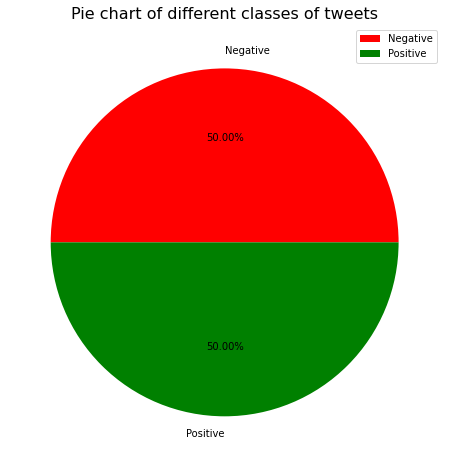

In [35]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()
#plotting a pie chart for descriptive analysis

In [36]:
data = data.dropna(axis = 0, how ='any')

In [37]:
print(len(data.text))
score=[]

1596753


In [43]:
#calculating sentimental score for each tweet
nums = [0,400000,800000,1200000,1596754]
tweets_list=data.text[nums[3]:nums[4]]
for i in tweets_list:
    analysis = TextBlob(i)
    score.append(analysis.sentiment.polarity)
print("All data is processed")

All data is processed


In [44]:
print(data.info())
detected_sentiment=[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596753 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596753 non-null  object
 1   target  1596753 non-null  object
dtypes: object(2)
memory usage: 36.5+ MB
None


In [48]:
#finding corresponing sentiment type based upon calculated sentiment score
scores_list=score[nums[3]:nums[4]]
for i in scores_list:
    if i > 0:
        detected_sentiment.append('positive')
    elif i == 0:
        detected_sentiment.append('neutral')
    else:
        detected_sentiment.append('negative')
print("Processing done")
print(len(detected_sentiment))

Processing done
1596753


In [49]:
print(len(data.text))
print(len(score))
print(len(data))
print(len(detected_sentiment))

1596753
1596753
1596753
1596753


Saving new csv file with columns text,actual sentiment, sentiment_score, and detected sentiment 

In [83]:
new_df = pd.DataFrame(data.text,columns=['text'])
new_df['actual'] = data.target
new_df['sentiment_score'] = score
new_df['detected'] = detected_sentiment
new_df.to_csv('classified_tweets.csv',encoding='utf-8')
csv = 'classified_tweets.csv'
my_df = pd.read_csv(csv,index_col=0)
data=my_df
data.info()

c:\users\manth\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596753 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   text             1596753 non-null  object 
 1   actual           1596753 non-null  object 
 2   sentiment_score  1596753 non-null  float64
 3   detected         1596753 non-null  object 
dtypes: float64(1), object(3)
memory usage: 60.9+ MB


In [53]:
#finidng number of positive, negative and neutral tweets
data.head()
data['detected'].value_counts()

positive    702840
neutral     557565
negative    336348
Name: detected, dtype: int64

In [54]:
data['sentiment_score'].describe()

count    1.596753e+06
mean     9.541386e-02
std      3.302606e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.857143e-01
max      1.000000e+00
Name: sentiment_score, dtype: float64

In [55]:
positive_tweets_list=data[data['detected']=='positive']
neutral_tweets_list=data[data['detected']=='neutral']
negative_tweets_list=data[data['detected']=='negative']

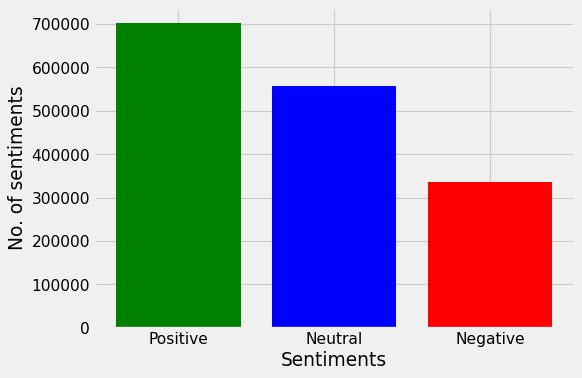

In [56]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6, 4), dpi=80)
ax = fig.add_axes([0,0,1,1])
sentiments = ['Positive','Neutral','Negative']
no_of_tweets = [len(positive_tweets_list),len(neutral_tweets_list),len(negative_tweets_list)]
ax.bar(sentiments,no_of_tweets,color=['green', 'blue', 'red'])
plt.xlabel('Sentiments')
plt.ylabel('No. of sentiments')
plt.show()

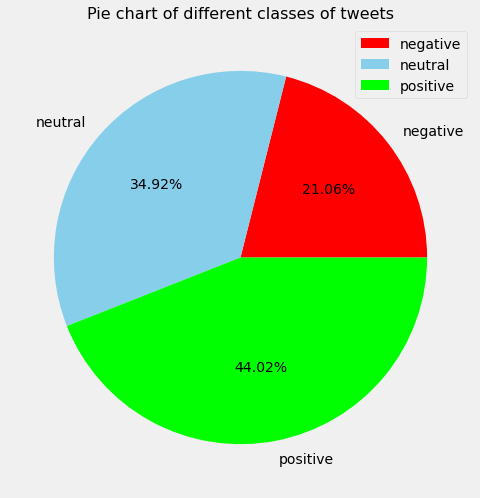

In [57]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('detected').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','skyblue','lime'],textprops={'fontsize': 14})
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

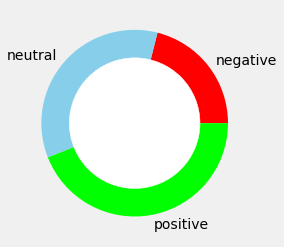

In [58]:
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(targets, labels=["negative","neutral","positive"], colors=['red','skyblue','lime'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

KeyError: 208

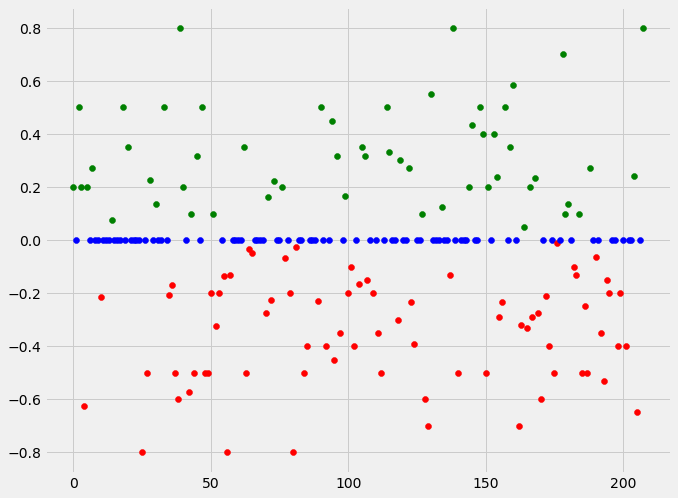

In [60]:
col =[]
for i in data.sentiment_score:
    if i<0:
        col.append('red')  
    elif i==0:
        col.append('blue')
    else:
        col.append('green') 
plt.style.use("fivethirtyeight")
x = data.index[:1000]
y = data.sentiment_score[:1000]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
for i in range(1000):
    plt.scatter(x[i], y[i],c=col[i])
plt.show()

In [61]:
data.sentiment_score.value_counts()

 0.000000    557565
 0.500000    74505 
 0.200000    60509 
-0.500000    39327 
 0.800000    38788 
             ...   
-0.425714    1     
-0.098958    1     
-0.027679    1     
 0.192460    1     
 0.137649    1     
Name: sentiment_score, Length: 13503, dtype: int64

# Implementing different algorithms 

In [257]:
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

'\nSplit your data into training and evaluation sets.\nSelect a model architecture.\nUse training data to train your model.\nUse test data to evaluate the performance of your model.\nUse your trained model on new data to generate predictions, which in this case will be a number between -1.0 and 1.0\n'

In [84]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8,sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(data['text'][:1000])
test_vectors = vectorizer.transform(data['text'][:1000])

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. ... Training a SVM with a Linear Kernel is Faster than with any other Kernel.

In [133]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, data['detected'][:1000])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data['detected'][:1000], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('Accuracy of SVM: ', report['accuracy']*100,"%")

Training time: 0.158567s; Prediction time: 0.075010s
positive:  {'precision': 0.9245283018867925, 'recall': 0.8112582781456954, 'f1-score': 0.8641975308641975, 'support': 302}
negative:  {'precision': 0.8676923076923077, 'recall': 0.8057142857142857, 'f1-score': 0.8355555555555556, 'support': 350}
Accuracy of SVM:  85.3 %


In [108]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(classifier_linear)

# Testing the model with different examples

In [109]:

li=['Duh, I know this already, people say nice things about my business.',"I found this film so awesome, it made me cry","I have never seen such a great movie. Best ever","This is a horrible movie. I really hated it!","I have never seen such worst movie. The director should be fired","What should I say... This is the worst movie ever"]
s=vectorizer.transform(li)
pred=classifier_linear.predict(s)
for i,j in zip(li,pred):
    print(i,'>>',j)

Duh, I know this already, people say nice things about my business. >> negative
I found this film so awesome, it made me cry >> neutral
I have never seen such a great movie. Best ever >> positive
This is a horrible movie. I really hated it! >> negative
I have never seen such worst movie. The director should be fired >> neutral
What should I say... This is the worst movie ever >> neutral


In [110]:
sentPositive = [
  "I like it", "like it a lot", "It's really good",
  "recommend!", "Enjoyed!", "like it",
  "It's really good", "recommend too",
  "outstanding", "good", "recommend!",
  "like it a lot", "really good", 
  "Definitely recommend!", "It is fun",
  "liked!", "highly recommend this",
  "fantastic show", "exciting",
  "Very good", "it's ok",
  "exciting show", "amazing performance",
  "it is great!","I am excited a lot",
  "it is terrific", "Definitely good one",
  "very satisfied", "Glad we went",
  "Once again outstanding!", "awesome"
]
 
sentNegative = [
  "Not good at all!","rude",
  "It is rude", "I don't like this type",
  "poor", "Boring", "Not good!",
  "not liked", "I hate this type of",
  "not recommend", "not satisfied",
  "not enjoyed", "Not recommend this.",
  "disgusting movie","waste of time",
  "feel tired after watching this",
  "horrible performance", "not so good",
  "so boring I fell asleep", "poor show",
  "a bit strange","terrible"
]

In [111]:
for i in sentPositive:
    review_vector = vectorizer.transform([i]) # vectorizing
    print(i,'>>>',*classifier_linear.predict(review_vector))

I like it >>> neutral
like it a lot >>> neutral
It's really good >>> positive
recommend! >>> neutral
Enjoyed! >>> neutral
like it >>> neutral
It's really good >>> positive
recommend too >>> neutral
outstanding >>> neutral
good >>> positive
recommend! >>> neutral
like it a lot >>> neutral
really good >>> positive
Definitely recommend! >>> neutral
It is fun >>> negative
liked! >>> neutral
highly recommend this >>> neutral
fantastic show >>> neutral
exciting >>> neutral
Very good >>> positive
it's ok >>> positive
exciting show >>> neutral
amazing performance >>> neutral
it is great! >>> positive
I am excited a lot >>> neutral
it is terrific >>> neutral
Definitely good one >>> positive
very satisfied >>> positive
Glad we went >>> neutral
Once again outstanding! >>> neutral
awesome >>> neutral


In [112]:
for i in sentNegative:
    review_vector = vectorizer.transform([i]) # vectorizing
    print(i,'>>>',*classifier_linear.predict(review_vector))

Not good at all! >>> positive
rude >>> neutral
It is rude >>> neutral
I don't like this type >>> neutral
poor >>> negative
Boring >>> neutral
Not good! >>> positive
not liked >>> neutral
I hate this type of >>> negative
not recommend >>> neutral
not satisfied >>> neutral
not enjoyed >>> neutral
Not recommend this. >>> negative
disgusting movie >>> neutral
waste of time >>> neutral
feel tired after watching this >>> negative
horrible performance >>> negative
not so good >>> positive
so boring I fell asleep >>> negative
poor show >>> negative
a bit strange >>> neutral
terrible >>> neutral


In [113]:
temp_data=[]
for i in data.sentiment_score:
    if i<0:
        temp_data.append(0)
    else:
        temp_data.append(1)

In [114]:
print(temp_data[:20])

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [115]:
data.head()
x=data['text']
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,2))
x=tfidf.fit_transform(x)
y=temp_data

In [116]:
x.shape

(1596753, 10000)

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
x_train.shape,x_test.shape

((1277402, 10000), (319351, 10000))

In [119]:
clf=LinearSVC()
clf.fit(x_train,y_train)

LinearSVC()

In [129]:
y_pred=clf.predict(x_test)

In [132]:
accuracy_score = metrics.accuracy_score(y_pred,y_test)
print("Accuracy of Linear Support vector classifier is ",str('{:04.2f}'.format(accuracy_score*100))+'%')

Accuracy of Linear Support vector classifier is  97.44%


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     67515
           1       0.98      0.99      0.98    251836

    accuracy                           0.97    319351
   macro avg       0.96      0.96      0.96    319351
weighted avg       0.97      0.97      0.97    319351



In [135]:
text1='congratulations! you won the match'
vec=tfidf.transform([text1])

In [136]:
clf.predict(vec)[0]

1

In [137]:
for i in sentPositive:
    text1=i
    vec=tfidf.transform([text1])
    if clf.predict(vec)[0]==1:
        s='positive'
    else:
        s='negative'
    print(i,'[',s,']')

I like it [ positive ]
like it a lot [ positive ]
It's really good [ positive ]
recommend! [ positive ]
Enjoyed! [ positive ]
like it [ positive ]
It's really good [ positive ]
recommend too [ positive ]
outstanding [ positive ]
good [ positive ]
recommend! [ positive ]
like it a lot [ positive ]
really good [ positive ]
Definitely recommend! [ positive ]
It is fun [ positive ]
liked! [ positive ]
highly recommend this [ positive ]
fantastic show [ positive ]
exciting [ positive ]
Very good [ positive ]
it's ok [ positive ]
exciting show [ positive ]
amazing performance [ positive ]
it is great! [ positive ]
I am excited a lot [ positive ]
it is terrific [ positive ]
Definitely good one [ positive ]
very satisfied [ positive ]
Glad we went [ positive ]
Once again outstanding! [ positive ]
awesome [ positive ]


In [138]:
for i in sentNegative:
    text1=i
    vec=tfidf.transform([text1])
    if clf.predict(vec)[0]==1:
        s='positive'
    else:
        s='negative'
    print(i,'[',s,']')

Not good at all! [ negative ]
rude [ negative ]
It is rude [ negative ]
I don't like this type [ positive ]
poor [ negative ]
Boring [ negative ]
Not good! [ negative ]
not liked [ positive ]
I hate this type of [ negative ]
not recommend [ positive ]
not satisfied [ positive ]
not enjoyed [ positive ]
Not recommend this. [ positive ]
disgusting movie [ negative ]
waste of time [ negative ]
feel tired after watching this [ negative ]
horrible performance [ negative ]
not so good [ positive ]
so boring I fell asleep [ negative ]
poor show [ negative ]
a bit strange [ negative ]
terrible [ negative ]
